# **1. Import libraries**

In [ ]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')


# **2. Import dataset**

In [ ]:
df = pd.read_csv('/content/Mall_Customers.csv')

# **3. Exploratory Data Analysis**

In [ ]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
df.shape

(200, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Check for Null values

In [ ]:
df.isnull()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [ ]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## check for outliers

In [ ]:
print(df.describe(),2)

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000 2


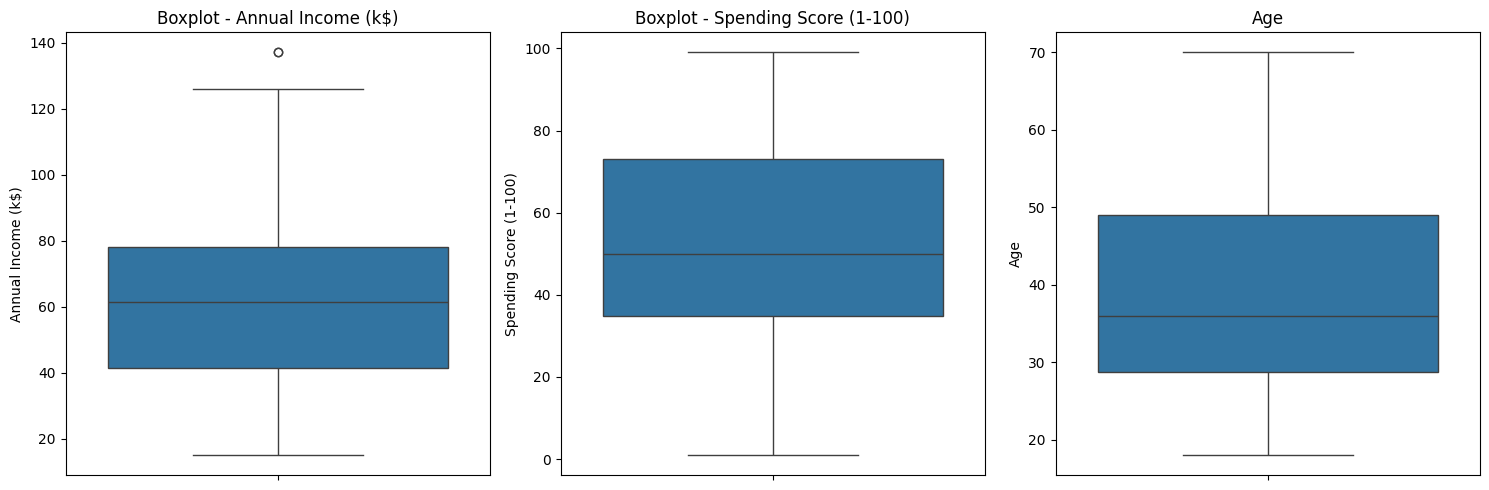

In [ ]:
plt.figure(figsize=(15,5)) # Increased figure width to accommodate 3 plots

# Annual Income
plt.subplot(1,3,1) # Changed subplot to 1x3 grid, first position
sns.boxplot(y=df["Annual Income (k$)"])
plt.title("Boxplot - Annual Income (k$)")

# Spending Score
plt.subplot(1,3,2) # Changed subplot to 1x3 grid, second position
sns.boxplot(y=df["Spending Score (1-100)"])
plt.title("Boxplot - Spending Score (1-100)")

# Age
plt.subplot(1,3,3) # Changed subplot to 1x3 grid, third position
sns.boxplot(y=df["Age"])
plt.title("Age")

plt.tight_layout()
plt.show()

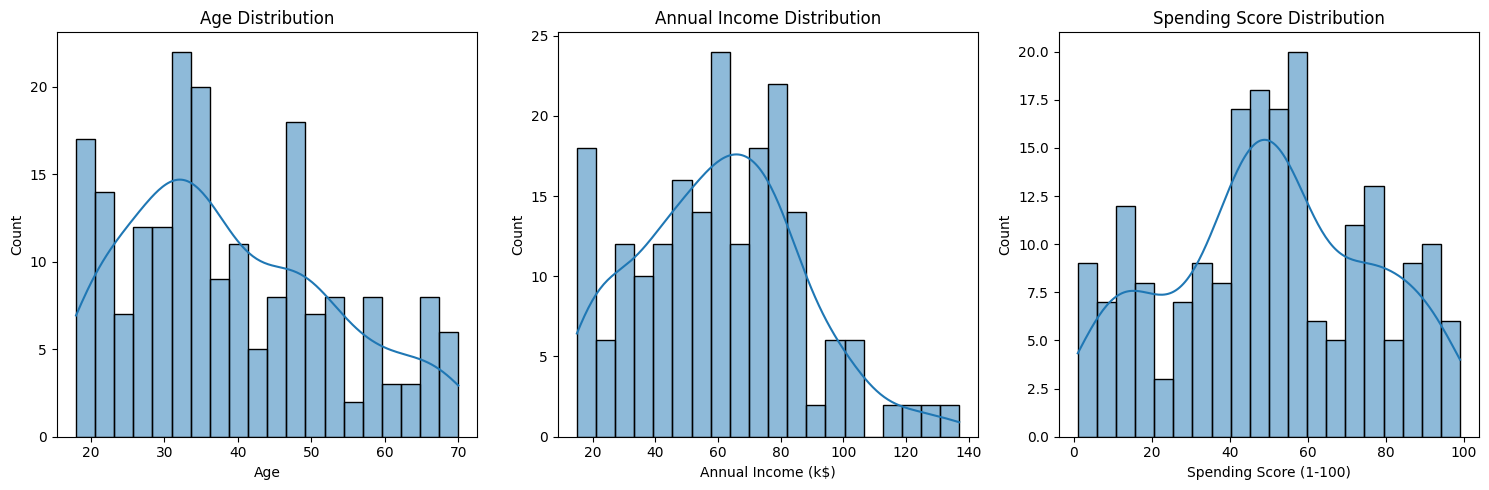

In [ ]:
plt.figure(figsize=(15,5))

# Age
plt.subplot(1,3,1)
sns.histplot(df["Age"], bins=20, kde=True)
plt.title("Age Distribution")

# Annual Income
plt.subplot(1,3,2)
sns.histplot(df["Annual Income (k$)"], bins=20, kde=True)
plt.title("Annual Income Distribution")

# Spending Score
plt.subplot(1,3,3)
sns.histplot(df["Spending Score (1-100)"], bins=20, kde=True)
plt.title("Spending Score Distribution")

plt.tight_layout()
plt.show()


## Correlation

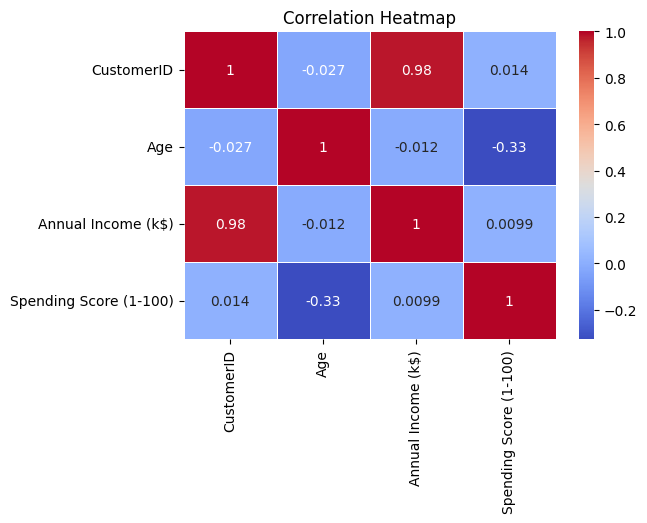

In [ ]:
#Correlation Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


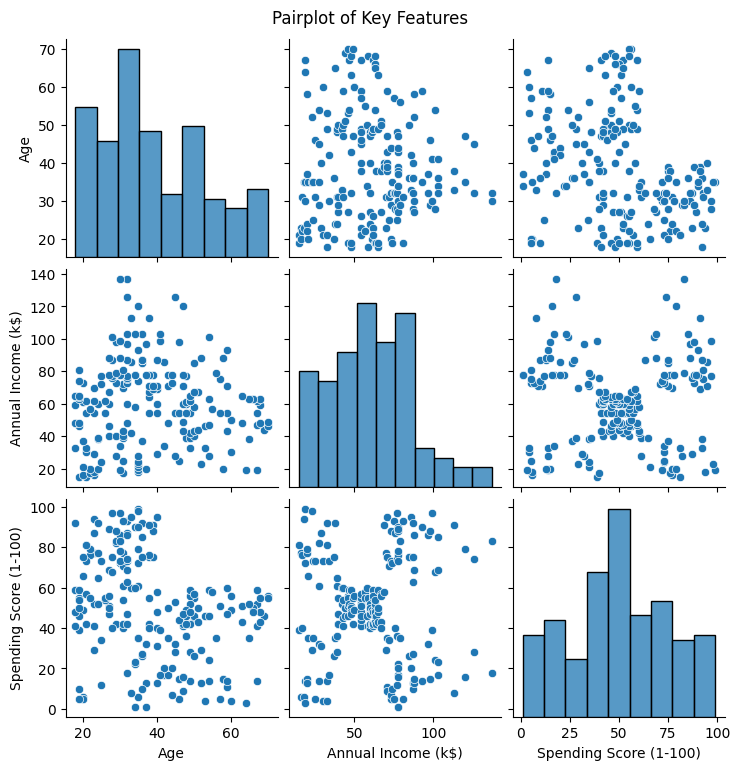

In [ ]:
#Pairplot
sns.pairplot(df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]])
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()

# **4. Feature Selection & Scaling**

In [ ]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Shape after scaling:", X_scaled.shape)
print("First 5 rows after scaling:\n", X_scaled[:5])

Shape after scaling: (200, 2)
First 5 rows after scaling:
 [[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]]


# **5. Modeling**

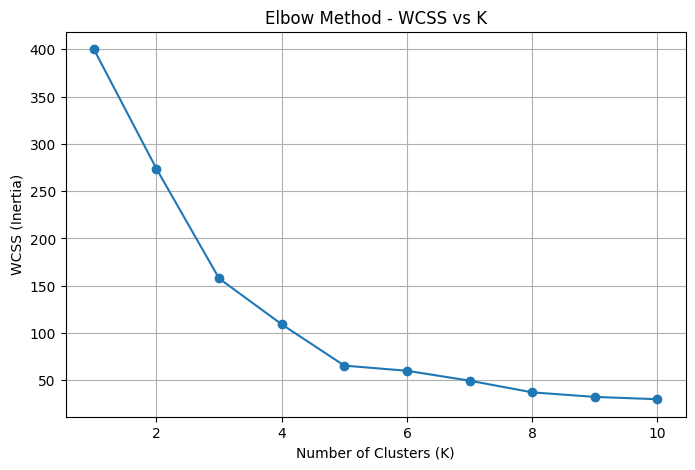

In [ ]:
#Elbow Method
wcss = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, wcss, marker='o')
plt.title("Elbow Method - WCSS vs K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Inertia)")
plt.grid(True)
plt.show()


In [ ]:
# Silhouette Score
from sklearn.metrics import silhouette_score

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    print(f"K={k}, Silhouette Score={score:.3f}")

K=2, Silhouette Score=0.397
K=3, Silhouette Score=0.467
K=4, Silhouette Score=0.494
K=5, Silhouette Score=0.555
K=6, Silhouette Score=0.514
K=7, Silhouette Score=0.502
K=8, Silhouette Score=0.455
K=9, Silhouette Score=0.457
K=10, Silhouette Score=0.445


In [ ]:
# Train final KMeans with K=5
kmeans = KMeans(n_clusters=5, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Preview clusters
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


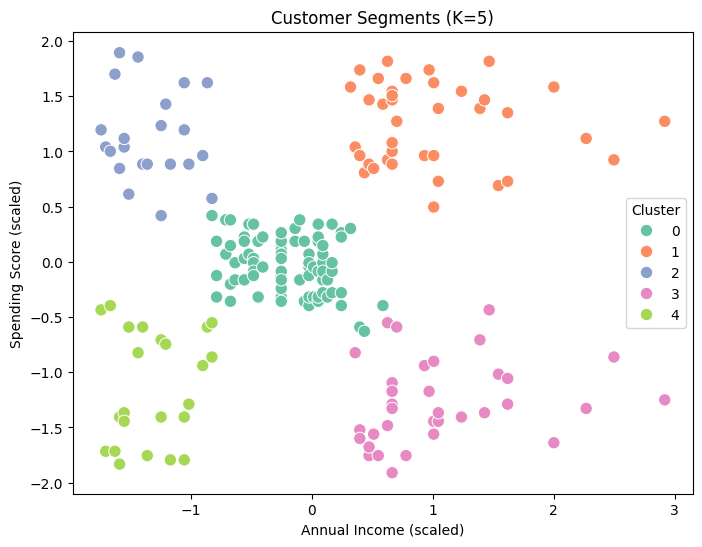

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_scaled[:,0],
    y=X_scaled[:,1],
    hue=df["Cluster"],
    palette="Set2",
    s=80
)
plt.title("Customer Segments (K=5)")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.legend(title="Cluster")
plt.show()


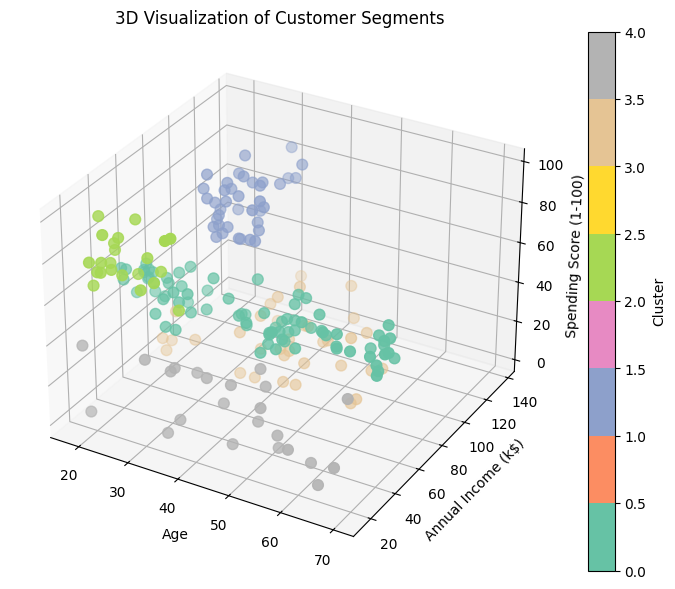

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(
    df["Age"],
    df["Annual Income (k$)"],
    df["Spending Score (1-100)"],
    c=df["Cluster"],
    cmap="Set2",
    s=60
)

ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")
ax.set_title("3D Visualization of Customer Segments")
plt.colorbar(sc, label="Cluster")
plt.show()


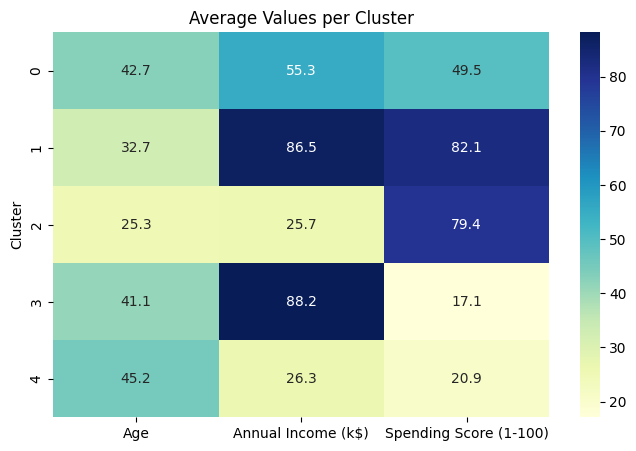

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,25.272727,25.727273,79.363636
3,41.114286,88.200000,17.114286
4,45.217391,26.304348,20.913043


In [ ]:
# Cluster centers (after scaling back to original features)
cluster_summary = df.groupby("Cluster")[["Age","Annual Income (k$)","Spending Score (1-100)"]].mean()

plt.figure(figsize=(8,5))
sns.heatmap(cluster_summary, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title("Average Values per Cluster")
plt.show()

cluster_summary


# Bonus

In [ ]:
from sklearn.cluster import DBSCAN


In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)  # ممكن نغير القيم حسب الحاجة
labels = dbscan.fit_predict(X_scaled)


In [ ]:
df["DBSCAN_Cluster"] = labels

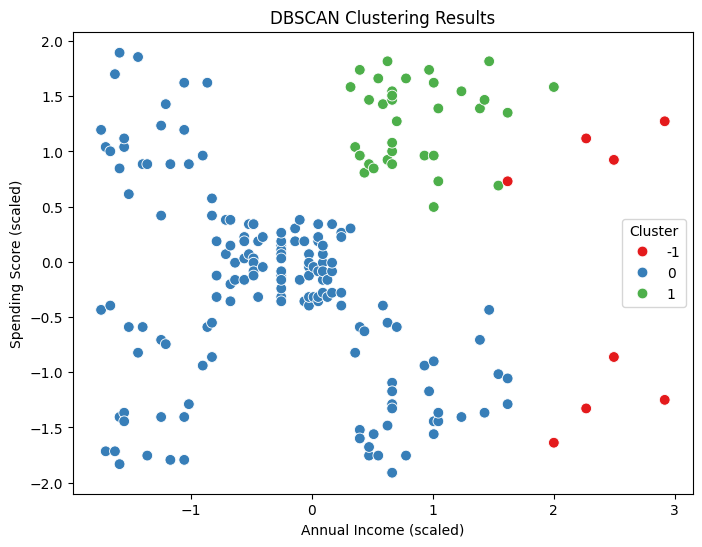

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=labels, palette="Set1", s=60)
plt.title("DBSCAN Clustering Results")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.legend(title="Cluster", loc="best")
plt.show()

In [ ]:
print("Clusters found:", len(set(labels)) - (1 if -1 in labels else 0))
print("Noise points:", list(labels).count(-1))

Clusters found: 2
Noise points: 8


In [ ]:
cluster_analysis = df.groupby("DBSCAN_Cluster")[["Annual Income (k$)", "Spending Score (1-100)"]].mean()
print(cluster_analysis)


                Annual Income (k$)  Spending Score (1-100)
DBSCAN_Cluster                                            
-1                      122.750000               46.875000
 0                       52.490446               43.101911
 1                       82.542857               82.800000


Text(0.5, 1.0, 'Average Values per DBSCAN Cluster')

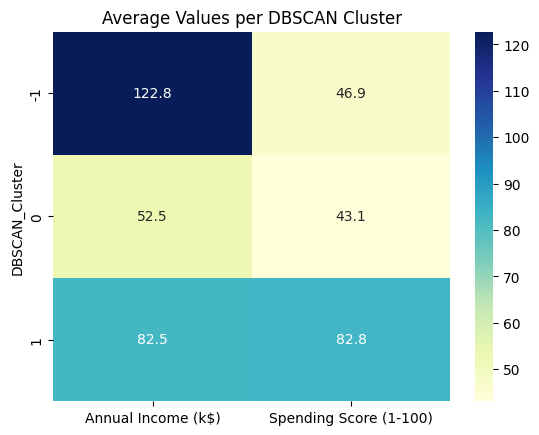

In [ ]:
sns.heatmap(cluster_analysis, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title("Average Values per DBSCAN Cluster")
